# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [1]:
import pandas as pd

In [30]:
petrol=pd.read_csv("petrol.csv")
petrol.head()

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
petrol.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
highway,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
dl,48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


In [4]:
petrol.isna()

,tax,income,highway,dl,consumption
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [5]:
petrol.dtypes

tax             float64
 income           int64
 highway          int64
 dl             float64
 consumption      int64
dtype: object

In [6]:
petrol.shape


(48, 5)

In [7]:
#for column_name in petrol.columns:
#    IQR=petrol[column_name].quantile(0.75)-petrol[column_name].quantile(0.25)
#    Lower=petrol[column_name].quantile(0.25)-1.5*IQR
#    Higher= petrol[column_name].quantile(0.75)+1.5*IQR
#    print("\n\nFor the coluumn '{} ', Upper cap is {} and Lower cap is {}\nBelow rows will be removed".format(column_name,Higher,Lower))
#    print(petrol[(petrol[column_name] <Lower) |(petrol[column_name] >Higher)])
#    petrol=petrol[(petrol[column_name] >=Lower) & (petrol[column_name] <=Higher)]

#considering outliers only for the target column

IQR=petrol[' consumption'].quantile(0.75)-petrol[' consumption'].quantile(0.25)
Lower=petrol[' consumption'].quantile(0.25)-1.5*IQR
Higher= petrol[' consumption'].quantile(0.75)+1.5*IQR
print("\n\nFor the coluumn 'consumption' Upper cap is {} and Lower cap is {}\nBelow rows will be removed".format(Higher,Lower))
print(petrol[(petrol[' consumption'] <Lower) |(petrol[' consumption'] >Higher)])
petrol=petrol[(petrol[' consumption'] >=Lower) & (petrol[' consumption'] <=Higher)]




For the coluumn 'consumption' Upper cap is 817.625 and Lower cap is 324.625
Below rows will be removed
    tax   income   highway     dl   consumption
18  7.0     4716      5915  0.724           865
39  7.0     4345      3905  0.672           968


In [8]:
petrol.shape #2 rows are deleted

(46, 5)

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [9]:
import seaborn as sns

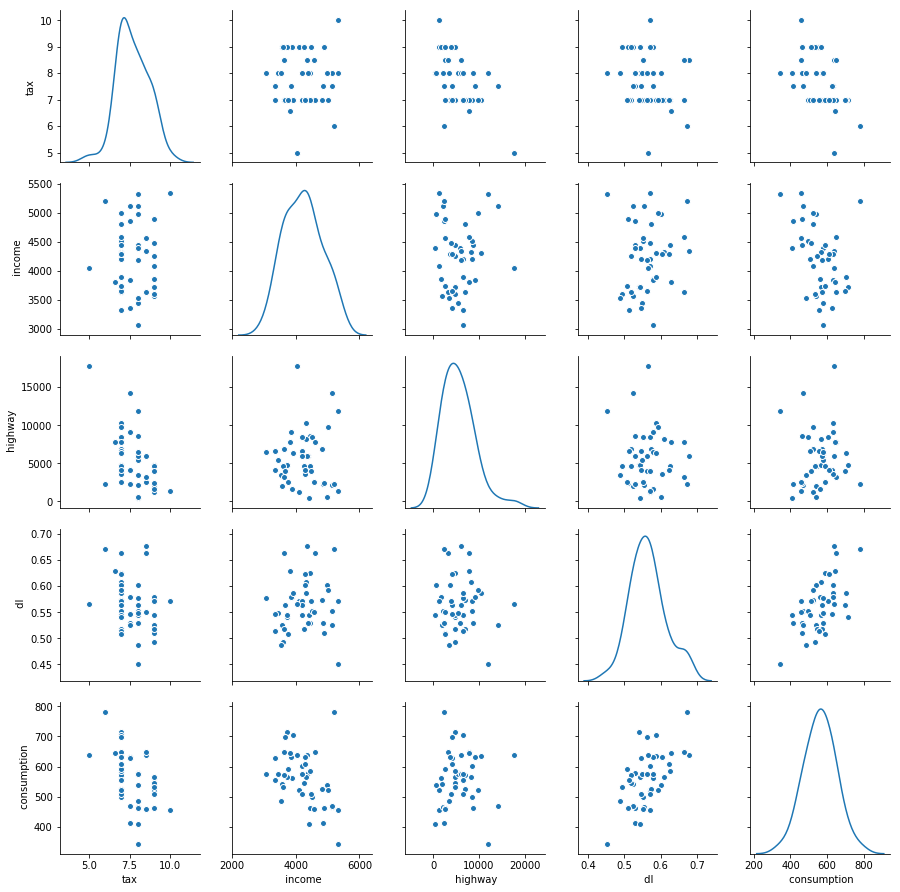

In [10]:
sns.pairplot(petrol,diag_kind='kde')

From the abpve plots 
consumption - tax : negative correlation
consumption - income : negative correlation
consumption - highway : ~ Zero correlation
consumption - dl : Positive correlation

In [11]:
petrol.corr()

,tax,income,highway,dl,consumption
tax,1.000000,0.028917,-0.535243,-0.251519,-0.472685
income,0.028917,1.000000,0.050926,0.115030,-0.404929
highway,-0.535243,0.050926,1.000000,-0.058466,0.065716
dl,-0.251519,0.115030,-0.058466,1.000000,0.600198
consumption,-0.472685,-0.404929,0.065716,0.600198,1.000000


### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [28]:
#considering only the columns with higher correlatoin i.e dl,tax

X=petrol.drop(columns=[' consumption',' income',' highway'])


In [13]:
y=petrol[' consumption']


# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [14]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)
print("shape of Original set is : {}".format(petrol.shape))
print("shape of X_train is : {}".format(X_train.shape))
print("shape of X_test is : {}".format(X_test.shape))
print("shape of y_train is : {}".format(y_train.shape))
print("shape of y_test is : {}".format(y_test.shape))

shape of Original set is : (46, 5)
shape of X_train is : (32, 2)
shape of X_test is : (14, 2)
shape of y_train is : (32,)
shape of y_test is : (14,)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [16]:
regr=LinearRegression()


In [17]:
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
regr.coef_

array([-32.63706995, 879.40412082])

In [19]:
beta=pd.DataFrame(regr.coef_,index=X.columns,columns=['Coeffcient']).transpose()
beta

,tax,dl
Coeffcient,-32.63707,879.404121


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [20]:
from sklearn.metrics import r2_score


In [21]:
y_pred = regr.predict(X_test)
y_pred

array([559.71379994, 616.48492447, 540.7570526 , 610.32909563,
       645.50526046, 591.76249161, 598.01743794, 548.67168969,
       641.39926569, 540.36690928, 484.37607138, 629.087608  ,
       599.77624618, 718.59491997])

In [22]:
regr.score(X_test,y_test)

0.46381102462787516

In [23]:
r2_score(y_test,y_pred)

0.46381102462787516

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [24]:
X2=petrol.drop(columns=[' consumption'])
y2=petrol[' consumption']


In [25]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.3,random_state=4)

print("shape of Original set is : {}".format(petrol.shape))
print("shape of X2_train is : {}".format(X2_train.shape))
print("shape of X2_test is : {}".format(X2_test.shape))
print("shape of y2_train is : {}".format(y2_train.shape))
print("shape of y2_test is : {}".format(y2_test.shape))

shape of Original set is : (46, 5)
shape of X2_train is : (32, 4)
shape of X2_test is : (14, 4)
shape of y2_train is : (32,)
shape of y2_test is : (14,)


In [26]:

regr2=LinearRegression()
regr2.fit(X2_train,y2_train)

regr2.score(X2_test,y2_test)


0.5995620265156256

# Question 9: Print the coefficients of the multilinear regression model

In [27]:
beta2=pd.DataFrame(regr2.coef_,index=X2.columns,columns=['coefficient']).transpose()
beta2

,tax,income,highway,dl
coefficient,-30.072045,-0.075167,-0.002782,916.694478


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

When number of independent variables are increased to predict a dependent variable accuuracy of Linear regression increases.
This is clearly evident from the increase in R^2 value(accuracy) when 4 variables are considered to that of 2 variable considered.

In [31]:

#If outliers are to be considered for every column, below is the code

for column_name in petrol.columns:
    IQR=petrol[column_name].quantile(0.75)-petrol[column_name].quantile(0.25)
    Lower=petrol[column_name].quantile(0.25)-1.5*IQR
    Higher= petrol[column_name].quantile(0.75)+1.5*IQR
    print("\n\nFor the coluumn '{} ', Upper cap is {} and Lower cap is {}\nBelow rows will be removed".format(column_name,Higher,Lower))
    print(petrol[(petrol[column_name] <Lower) |(petrol[column_name] >Higher)])




For the coluumn 'tax ', Upper cap is 9.8125 and Lower cap is 5.3125
Below rows will be removed
     tax   income   highway     dl   consumption
5   10.0     5342      1333  0.571           457
36   5.0     4045     17782  0.566           640


For the coluumn ' income ', Upper cap is 5838.375 and Lower cap is 2479.375
Below rows will be removed
Empty DataFrame
Columns: [tax,  income,  highway,  dl,  consumption]
Index: []


For the coluumn ' highway ', Upper cap is 13224.625 and Lower cap is -2958.375
Below rows will be removed
    tax   income   highway     dl   consumption
11  7.5     5126     14186  0.525           471
36  5.0     4045     17782  0.566           640


For the coluumn ' dl ', Upper cap is 0.6934999999999998 and Lower cap is 0.4315000000000002
Below rows will be removed
    tax   income   highway     dl   consumption
18  7.0     4716      5915  0.724           865


For the coluumn ' consumption ', Upper cap is 817.625 and Lower cap is 324.625
Below rows will be rem